# PyTorch/Transfer Learning Tutorial

### License
* [BSD 3 Clause](https://opensource.org/licenses/BSD-3-Clause)
* Author: Jeffrey R. Van Voorst

### Forward

This workbook goes through some steps to train a simple network to classify images and show the power of transfer learning.  These steps will help to provide familiarity with PyTorch's Neural Network Module and Functional constructs and torchvision.  The chosen dataset is the cropped Belgian traffic signs dataset.

The purpose of this workbook is to be an introduction to [PyTorch](https://pytorch.org/), [torchvision](https://pytorch.org/docs/stable/torchvision/index.html) , [Pillow](https://pillow.readthedocs.io/en/stable/) and [Google's Colaboratory](https://colab.research.google.com/).


*   PyTorch is "an open source deep learning [Pythonic] platform that provides a seamless path from research prototyping to production deployment"
*   PyTorch does not support Google's TPU :(
*   torchvision is a PyTorch module for manipulating and classifying images
*   Pillow is a better Python image library; it is a drop-in replacement for PIL
*   Colaboratory is a Google research project that hosts Python Jupyter notebooks and provides:
** 2 cpu cores
** 1 Nvidia GPU (K80?)
** about 13GB RAM
** some disk space
** can mount your Google drive


[ONNX](https://onnx.ai/) may be used to write (trained) networks in a (somewhat) framework agnostic format.  This allows for better flow of ideas.


For a more gentle/detailed introduction to PyTorch, see the following PyTorch tutorial [60 minutes deep learning blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).

Belgian Traffic Signs Dataset:

Radu Timofte, Markus Mathias, Rodrigo Benenson, and Luc Van Gool, Traffic Sign Recognition - How far are we from the solution?, International Joint Conference on Neural Networks (IJCNN 2013), August 2013, Dallas, USA. (* equal contributions) [pdf][bib]  https://btsd.ethz.ch/shareddata/

Those who are not familiar with Belgian traffic signs may use OpenStreetMap's [road signs in Belgium](https://wiki.openstreetmap.org/wiki/Road_signs_in_Belgium) page. 

This notebook is loosely based on the following TensorFlow tutorial: https://www.datacamp.com/community/tutorials/tensorflow-tutorial

Started with Colab and ideas from:  https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c

Paper that gives some weight to using small (2 to 32) minibatches https://arxiv.org/abs/1804.07612

# First Step
Click on Edit and then Notebook Settings

Change the hardware accelerator to GPU

This should be done prior to the rest of the notebook as changing the values will implicitly restart the runtime

# Second Step

Upgrade Pillow to avoid bugs in earlier versions.

In [1]:
# upgrade Pillow and then restart the Runtime -- supposedly older versions of Pillow are buggy
!pip3 install Pillow --upgrade

     |████████████████████████████████| 2.0MB 2.8MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 4.3.0
    Uninstalling Pillow-4.3.0:
      Successfully uninstalled Pillow-4.3.0


This is neat...
One can mount the Google Drive that is associated with her account to this machine.

In [1]:
# Many traditional linux/unix commands are available from the notebook by using the '!' prefix.
# Some commands like cd may not work as you expect.
!pwd
!cd /bin
!pwd
!git --version

# Connect to Google Drive

from google.colab import drive
drive.mount('/content/gdrive')

/content
/content
git version 2.17.1
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Download the cropped Belgian Traffic Signs datasets.  
There are two datasets: one is expected to be for training and the other for testing.

In [0]:
# Download the Belgian Traffic Signs datasets
#!curl https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Training.zip -o /content/gdrive/'My Drive'/Datasets/Belgian_Signs/BelgiumTSC_Training.zip
#!curl https://btsd.ethz.ch/shareddata/BelgiumTSC/BelgiumTSC_Testing.zip -o /content/gdrive/'My Drive'/Datasets/Belgian_Signs/BelgiumTSC_Testing.zip
signs_dir = "/content/gdrive/My Drive/Datasets/Belgian_Signs"

What should be done next?  
How about unzipping the images and seeing what is in the datasets?
That seems like a good idea...

Doing so will enable use of the ImageFolder or DatasetFolder functions from the torchvision datasets module to load the training and test examples and class labels.
```

















```
#Wait!
Unfortunately, this is quite slow (especially if you extract the images to Google Drive).
```

```
There *is* a better way...  
What resources do the nodes have?  
There is plenty of disk space locally or probably in Google Drive. 
These nodes have a decent amount of memory.  
What if one could extract the files in memory?
Do you mean like extracting the files into a RAM disk or tmpfs?  Almost, but not quite..

### Python zipfile to the rescue!
zipfile is a module in the Python standard library.  


### Side note
Maybe a local copy of the data would also work.  The only issue is that after Colab resets, your data would be gone.  Of course, for your own compute, it might make more sense to load the data from images files.


In [4]:
# List the files in the zipfile to see the layout
!unzip -l "/content/gdrive/My Drive/Datasets/Belgian_Signs/BelgiumTSC_Testing.zip" | head -n 30

Archive:  /content/gdrive/My Drive/Datasets/Belgian_Signs/BelgiumTSC_Testing.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
        0  2014-02-13 17:14   Testing/
        0  2014-02-13 16:59   Testing/00000/
    34683  2011-02-03 11:51   Testing/00000/00017_00000.ppm
    27649  2011-02-03 11:51   Testing/00000/00017_00001.ppm
    31815  2011-02-03 11:51   Testing/00000/00017_00002.ppm
    10444  2011-02-03 11:51   Testing/00000/00021_00000.ppm
    10987  2011-02-03 11:51   Testing/00000/00021_00001.ppm
    12073  2011-02-03 11:51   Testing/00000/00021_00002.ppm
      266  2011-02-03 11:51   Testing/00000/GT-00000.csv
        0  2014-02-13 16:59   Testing/00001/
    17773  2011-02-03 11:50   Testing/00001/00252_00000.ppm
    18238  2011-02-03 11:50   Testing/00001/00252_00001.ppm
    20929  2011-02-03 11:50   Testing/00001/00252_00002.ppm
   139299  2011-02-03 11:50   Testing/00001/00398_00000.ppm
    46068  2011-02-03 11:50   Testing/00001/00398_00001.ppm
   

## Write a function to use zipfile to load the images into one bucket (list) per class

torchvision has several functions that can operate on PIL images.  Load the images and class labels from the specified zip file.  Pillow's Image class will automatically detect the image format based on the file name and file contents.
###NOTE:
Given a pathlib Path object *p*, you may find the parent directory name using *p.parent.name*

We saw that the directory names were class labels (integers)

The PIL.Image.open function can be used to read from an open file

You may use the open function of a zipfile object to read a specified file by name

In [0]:
import zipfile
import PIL
from pathlib import Path
from timeit import default_timer as timer

def load_images_from_zipfile(data_file, num_classes):
    """
    Load images from a zipfile where the parent dir of an image is it's class 
    and can be converted to an integer.
    The result is a list of PIL images (so that we can more easily apply torchvision transforms)
    """
    images = [ [] for i in range(num_classes)]
    labels = [ [] for i in range(num_classes)]
    
    start_time = timer()
    count = 0
    with zipfile.ZipFile(data_file, 'r') as my_zip:
        for name in my_zip.namelist():
            name_path = Path(name)
            if name.endswith('.ppm'):
                # Write code to get the label and image data for the current name and append them to the corresponding list in each list
                ### ~3 lines of code ####
                label = int(name_path.parent.name)
                labels[label].append(label)               
                images[label].append(PIL.Image.open(my_zip.open(name)))
                ###
                count += 1
                if (count % 500) == 0:
                    print("num images", count)
    end_time = timer()
    print ("elapsed time:", end_time-start_time)    
    
    return {"images": images, "labels": labels}

Now we can use the function that you wrote to load the train and test datasets.

If you were able to see it, you know that there are 62 different signs.  Although, the above function could have been written to add lists as needed, it is more clear in its current form.

In [6]:
# set signs_dir to the directory where you saved the zip files
signs_dir = Path('/content/gdrive/My Drive/Datasets/Belgian_Signs')
color_test_zip = signs_dir / 'BelgiumTSC_Testing.zip'
color_train_zip = signs_dir / 'BelgiumTSC_Training.zip'

num_classes = 62
color_test_dataset = load_images_from_zipfile(color_test_zip, num_classes)
color_train_dataset = load_images_from_zipfile(color_train_zip, num_classes)

num images 500
num images 1000
num images 1500
num images 2000
num images 2500
elapsed time: 2.7948647780000044
num images 500
num images 1000
num images 1500
num images 2000
num images 2500
num images 3000
num images 3500
num images 4000
num images 4500
elapsed time: 6.1253290390000075


There, that wasn't bad at all.  Usually the images can be loaded in less than 10 seconds by reading directly from the zip files.
### Sidetrack:
Why did this work so well and, anecdotally, read at least 100 times faster than reading each image (separate) from disk?

My theory has several parts: 

*   disks (and google cloud storage) are very good at large sequential reads.  Sequentially iterating through a file like the sequential reads in the zip file function means that prefetching, streaming, and caching are used to our advantage
*   Google Cloud Storage should support read speeds of tens of megabytes per second; the two zipfiles have a combined size of about 240MB -- read speed was better than 25 MB/s
*   There are only 2 metadata records (one for each zip file); the storage only needs to read and update the metadata for 2 files (versus about 7,000 files if we read them all from disk one-by-one)
*  (wild guess): Google purchased Kaggle a few years ago: Google has cached these zipfiles in its storage



In [7]:
import numpy as np

# get the class counts
def class_counts(dataset_dict):
    ### ~1 line of code ###
    return [len(s) for s in dataset_dict["labels"]]
    ###
    
train_counts = class_counts(color_train_dataset)
test_counts = class_counts(color_test_dataset)
print("max train images in one class:", np.max(train_counts))
print("min train images in one class:", np.min(train_counts))

max train images in one class: 375
min train images in one class: 6


### Plot a histogram of the counts

Since this is a classification problem, the data has already been binned by class.  A bar chart can be used to display the counts for each sign category.

Text(0, 0.5, 'Image counts')

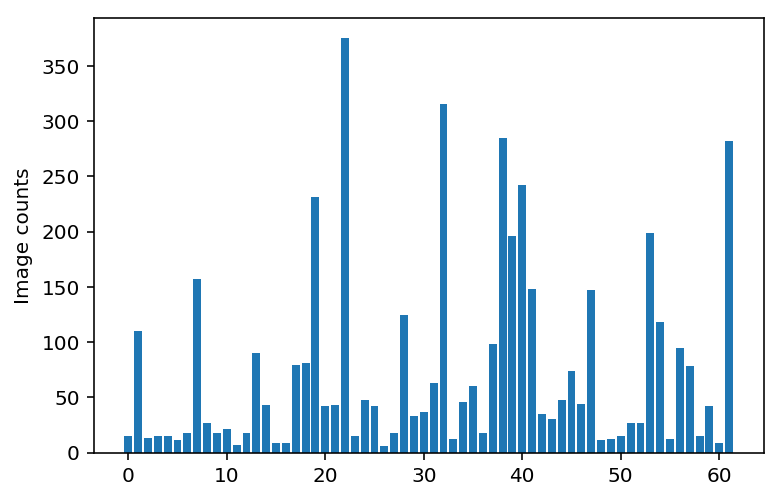

In [8]:
# Plot a histogram of the counts of the test data
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mp
import matplotlib.pyplot as plt
labels = [int(col[0]) for col in color_train_dataset["labels"]]
plt.bar(labels, train_counts)
plt.ylabel('Image counts')

### Plot an image from each category

Can use matplotlib to plot one image from each category.  

If you are interested, you may find the Belgian traffic signs' purposes in OpenStreetMap's [road signs in Belgium](https://wiki.openstreetmap.org/wiki/Road_signs_in_Belgium) page. 

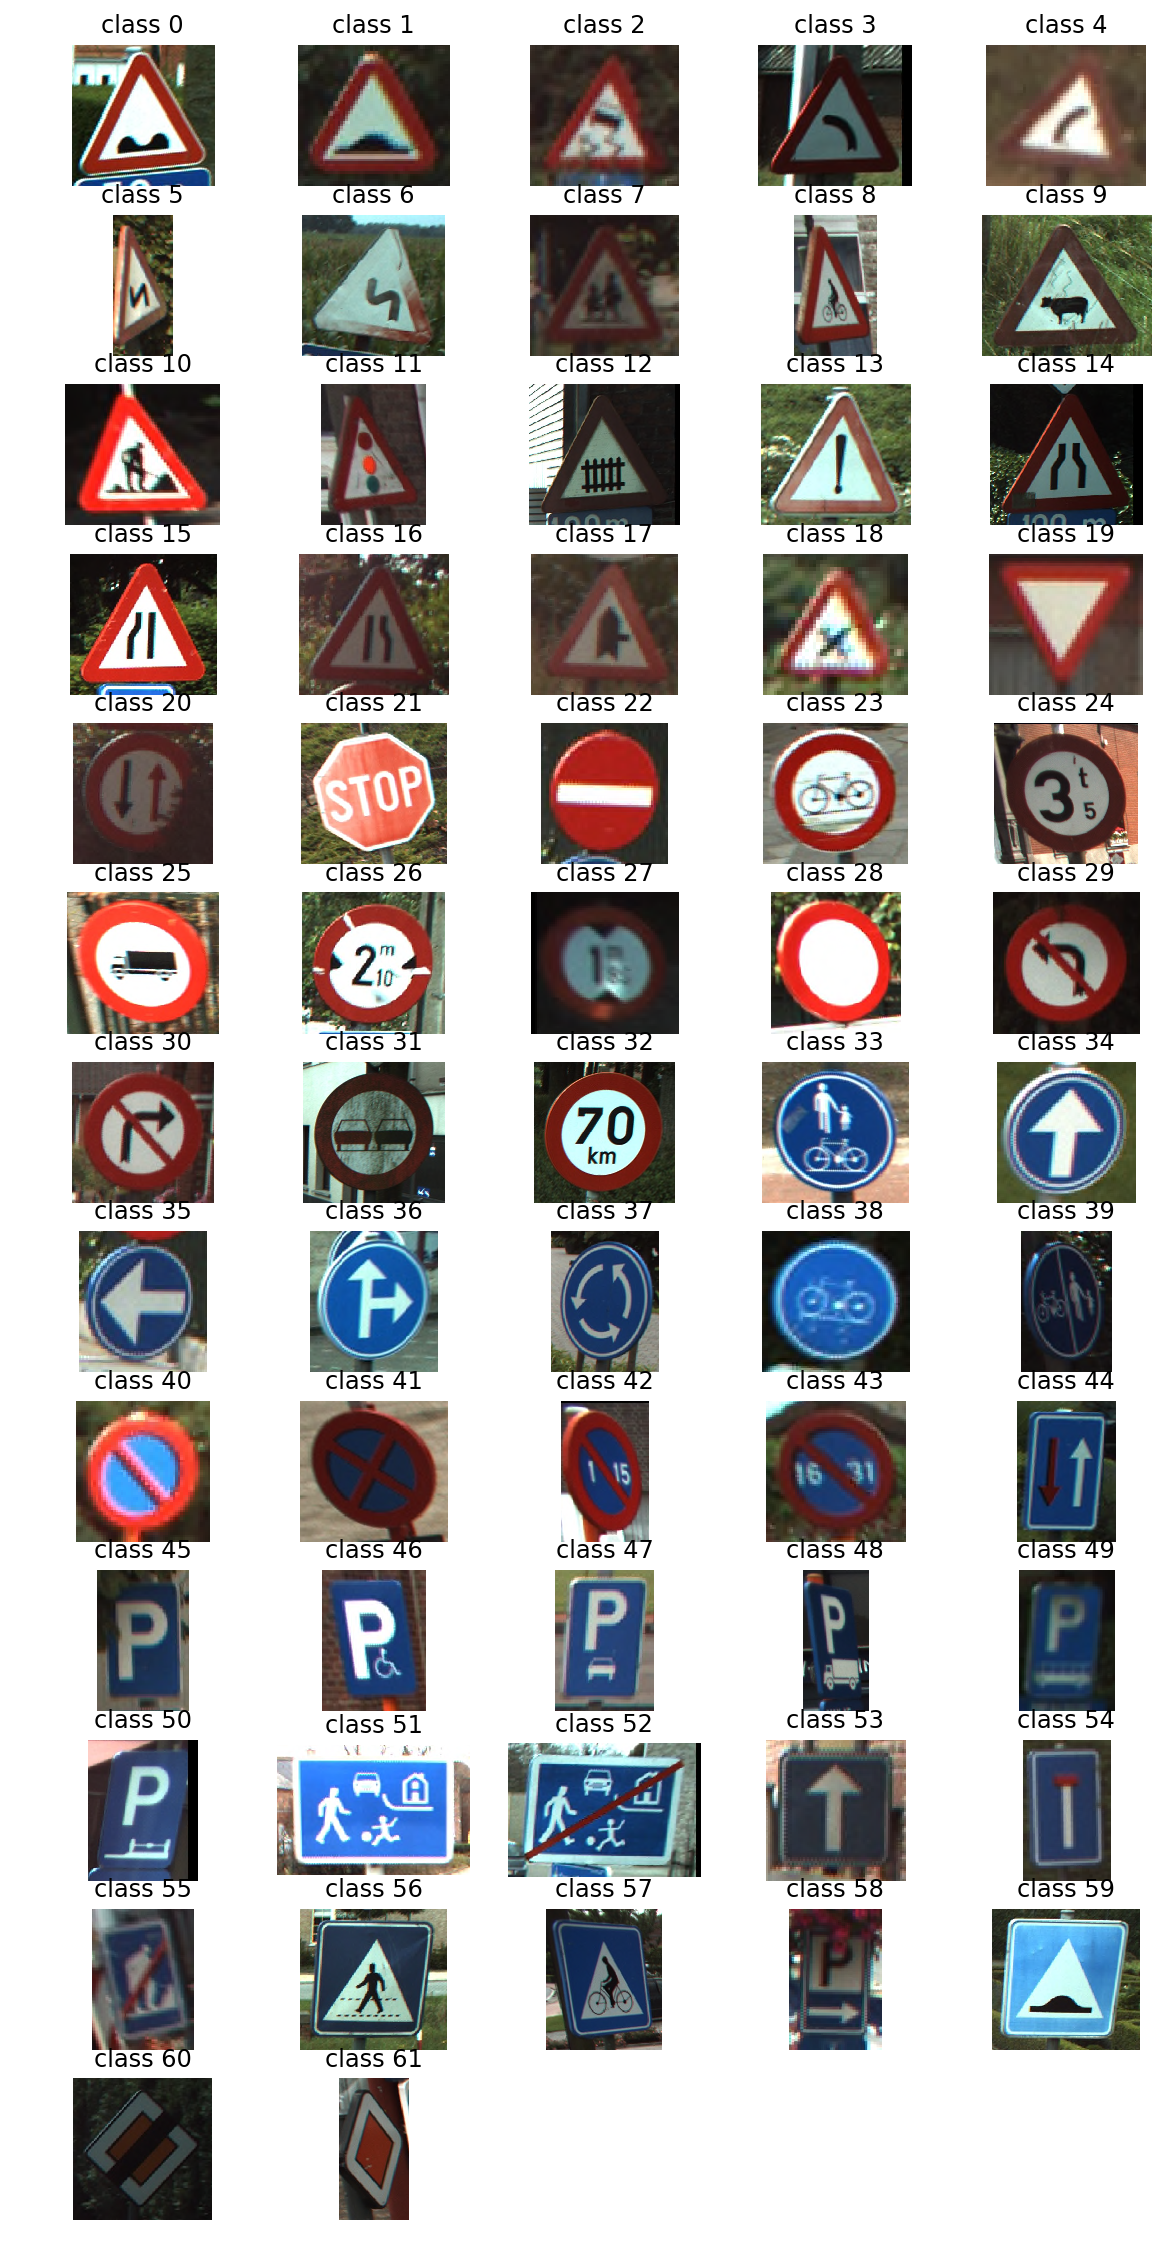

In [9]:
plt.figure(figsize=(10,20))
columns = 5
for i, images in enumerate(color_train_dataset["images"]):
    plt.subplot(num_classes / columns + 1, columns, i + 1)
    cax = plt.imshow(images[0])
    plt.title("class {}".format(color_train_dataset["labels"][i][0]))
    plt.axis('off')

We now need to break up the training set into two sets.  A training set and a validation or development test set (dev test) -- see https://cs230.stanford.edu/files/C2M1.pdf.  That way, our model parameters and tuning shouldn't be influenced by the test set.

Clearly the classes are very unbalanced.  What options do we have?

If we shuffle the training images, and select some percentage of the image uniformly at random (without replacement) or via boosted aggregation (bagging), we are likely to have the dev test set be over sampled from some categories few or no samples from those with few samples.

Maybe we can try a straightforward stratified sampling...



## Stratified Sampling

In this case, although the amount of data is small, a dev test set of 10% seems to provide satisfactory performance. 

The idea is to divide each class into approximately 90% training images and 10% dev test images

Prior to this, we need to consider reproducibility.  That is, we want the same outcome when we run the notebook again.  Because we are using pseudo random numbers, we can achive this using the same seed for the random number generator(s).

https://pytorch.org/docs/stable/notes/randomness.html

### Sidenote:

Stratified sampling is not necessarily applicable in many cases.  If classes are artificial constructs or have overlaps or other confounding issues, stratified sampling may cause significant statistical issues.  In the case of traffic signs, the images are clear enough and there is, in my opinion, zero overlap between any two classes.

In [0]:
# Yes! PyTorch is now installed by default
import torch

def reset_seeds():
    torch.cuda.manual_seed(20190530)
    torch.manual_seed(20190530)
    np.random.seed(20190530)

def stratified_dataset_indices(class_counts):
    """
    Straightforward random split of dataset indices 
    into 90/10 percent for each class
    """
    train_indices = []
    dev_test_indices = []
    for c in class_counts:
        idz = np.arange(c)
        np.random.shuffle(idz)

        if c <= 10:
            num_test = 1
        elif c <= 20:
            num_test = 2
        else:
            num_test = int(np.round(c/10.0))
    
        dev_test_indices.append(idz[:num_test])
        train_indices.append(idz[num_test:])
    return (train_indices, dev_test_indices)

## Torch Tensors

Similar to TensorFlow or numpy, Torch has its own representation for tensors.  In order to use torch, the tensors need to be converted from lists or numpy ndarrays to torch tensors.

In [0]:
from IPython.core.debugger import set_trace

def split_dataset(images, labels, train_indices, dev_test_indices, torch_cat=False):
    if not len(images) == len(labels):
        raise ValueError("images and labels must have the same length")
    if not len(images) == len(train_indices):
        raise ValueError("images and train_indices must have the same length")
    if not len(images) == len(dev_test_indices):
        raise ValueError("images and dev_test_indices must have the same length")
        
    dev_test_set, train_set = [], []
    dev_test_labels, train_labels = [], []
    for i in range(len(train_indices)):
  
        dev_test_set.extend([images[i][j] for j in dev_test_indices[i]])
        dev_test_labels.append(labels[i][0] * torch.ones(len(dev_test_indices[i])))
        train_set.extend([images[i][j] for j in train_indices[i]])
        train_labels.append(labels[i][0] * torch.ones(len(train_indices[i])))
    
    return {
        "train_set": train_set,
        "train_labels": train_labels,
        "dev_test_set": dev_test_set,
        "dev_test_labels": dev_test_labels,
    }

### Perform the sampling and split the training dataset

Use the above functions to get a stratified sample of the training dataset.

In [0]:
reset_seeds()
(train_indices, dev_test_indices) = stratified_dataset_indices(train_counts)
my_datasets = split_dataset(color_train_dataset["images"], color_train_dataset["labels"], train_indices, dev_test_indices)

# Create Network "From Scratch" to Classify Signs

Similar to the way that many MNIST examples start, convert the images to greyscale and flatten the two dimentional array (pixel values) into a single dimension.

To get a suitable number of pixels, first resize the images to 112 by 112 pixels.  Since the number of images is relativel small and in memory, use the best available resampling method.   Making the images square may introduce some aspect ratio issues, but it is less work than keeping the aspect ratio.

In [0]:
from torchvision import transforms

def to_grey_112pixels(images_list):
    to_tensor = transforms.ToTensor()
    
    greys = []
    for img in images_list:     
        # need to flatten
        square_img = img.resize((112,112), resample=PIL.Image.BICUBIC)
        grey_img = square_img.convert(mode='L')
        greys.append(to_tensor(grey_img).reshape(1,-1).double())
    return torch.cat(greys)

## Apply the transformation function to the training images

In [0]:
### ~4 lines: convert images to 112x112 greyscale images; convert label lists to torch tensors ###
train_imgs = to_grey_112pixels(my_datasets["train_set"])
dev_test_imgs = to_grey_112pixels(my_datasets["dev_test_set"])
# if have time, remove long and show how to use debugger
train_labels = torch.cat(my_datasets["train_labels"]).long()
dev_test_labels = torch.cat(my_datasets["dev_test_labels"]).long()
###

Somewhat follow the tutorial titled ["What is *torch NN really*?"](https://pytorch.org/tutorials/beginner/nn_tutorial.html)?
For the first example, we will use primarily raw torch tensors and operations on them.
Let us create a simple network that is similar to multi-class logistic regression.  

That is, have one linear layer with a SoftMax activation function.
The loss function is the multi-class version of negative likelihood.

Because of numerical stability, lower computational costs, and the fact that it is easier to use the torch functions, we will be using LogSoftMax for the activation function and the Negative Log Likelihood (NNL) for the loss function.  However, there is no requirement that the activation functions or loss function be from the torch modules.

Possibly gentle introduction to [NNL](http://willwolf.io/2017/05/18/minimizing_the_negative_log_likelihood_in_english/).

In [0]:
my_device = torch.device("cpu")
## add cuda items here ##
use_cuda=True
if use_cuda and not torch.cuda.is_available():
    raise RuntimeError("Cuda is not available. :(")
    
my_device = torch.device("cuda:0") if use_cuda else torch.device("cpu")
##

### Create the weights and bias tensors

The model is linear with 112x112 inputs and 62 outputs.  In order for the network to be non-linear, the weights need to be non-zero.  Many implementations now use Xavier initialization to scale the weights in an way that tends to provide good convergence properties.

The model parameters are the weights and biases.  In order to optimize the parameters, ask torch to compute the gradients.

In [0]:
reset_seeds()
vec_size = train_imgs[0].shape[0]
num_classes = len(train_indices)

# use Xavier initialization: http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
weights = torch.randn(vec_size, num_classes).double() / np.sqrt(vec_size)
# note the trailing underscore implies the operation is applied to the existing object
weights.requires_grad_()
bias = torch.zeros(num_classes, requires_grad=True).double()

### Create the model and loss function

Use the torch provided functions for activation and loss.

In [0]:
from IPython.core.debugger import set_trace

(weights, bias, train_imgs, train_labels, dev_test_imgs, dev_test_labels) = \
    map(lambda x: x.to(my_device), (weights, bias, train_imgs, train_labels, dev_test_imgs, dev_test_labels))

# use LogSoftmax as it is more numerically stable and works well with NNLLoss
my_softmax = torch.nn.LogSoftmax(dim=0)
def model(x):
    return my_softmax(x @ weights + bias)
      
loss_func = torch.nn.NLLLoss()

idz = torch.randperm(train_imgs.shape[0])
rand_train_set = train_imgs[idz]
rand_train_labels = train_labels[idz]

### Create helper functions to compute accuracy and loss

In [0]:
def image_accuracy(out, yb):
  # Since we are using (Log)Softmax, the index with the highest value is the prediction
  # The exponent of the value is approximately the probability that the input belongs to that class
  preds = torch.argmax(out, dim=1)
  return (preds == yb).float().mean()

def compute_accuracy_and_loss(train_set=None, train_labels=None, test_set=None, test_labels=None):
    test_pred, train_pred = model(test_set), model(train_set)
    test_acc, test_loss = image_accuracy(test_pred, test_labels), loss_func(test_pred, test_labels)
    train_acc, train_loss = image_accuracy(train_pred, train_labels), loss_func(train_pred, train_labels)
    print("test/validation set accuracy, loss:", test_acc, test_loss)
    print("training set accuracy, loss:       ", train_acc, train_loss)

### Main function to train the model

In [0]:
from IPython.core.debugger import set_trace

def train_logistic_model(dataset, batch_size=32, lr=0.05, epochs=10):
    global bias, weights
    
    train_set, train_labels = dataset["train_set"], dataset["train_labels"]
    test_set, test_labels = dataset["test_set"], dataset["test_labels"]

    n = rand_train_set.shape[0]
    prev_epoch = 0
    
    start_time = timer()
    for epoch in range(epochs):
        # print out the accuracy and loss after each epoch
        if epoch != prev_epoch:
            prev_epoch = epoch
            print ("Starting Epoch", epoch)
            compute_accuracy_and_loss(**dataset)

        # // is floor division
        for i in range((n - 1) // batch_size + 1):
            #set_trace()
            # Get the indices, training examples, and training labels of the next minibatch
            start_i = i * batch_size
            end_i = start_i + batch_size
            xb = rand_train_set[start_i:end_i]
            yb = rand_train_labels[start_i:end_i]
            # compute the current model predictions and loss
            pred = model(xb)
            loss = loss_func(pred, yb)

            # must be missing something ... (see https://discuss.pytorch.org/t/grad-is-none-even-when-requires-grad-true/29826)
            bias.retain_grad()
            weights.retain_grad()
            # compute back propigation for the current minibatch
            loss.backward()

            # Don't update the gradients when updating the model's variables
            with torch.no_grad():
                # Gradient gives direction of greatest increase
                # To minimize, take a step in the opposite direction
                weights -= weights.grad * lr
                bias -= bias.grad * lr
                # Zero out the gradients after each step
                weights.grad.zero_()
                bias.grad.zero_()


    print("After stopping training")      
    compute_accuracy_and_loss(**dataset)


    end_time = timer()
    print ("total time:", end_time - start_time)

In [20]:
train_logistic_model({
    "train_set": rand_train_set,
    "train_labels": rand_train_labels,
    "test_set": dev_test_imgs,
    "test_labels": dev_test_labels,
})

Starting Epoch 1
test/validation set accuracy, loss: tensor(0.6695, device='cuda:0') tensor(4.1246, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)
training set accuracy, loss:        tensor(0.7199, device='cuda:0') tensor(6.1440, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)
Starting Epoch 2
test/validation set accuracy, loss: tensor(0.6908, device='cuda:0') tensor(3.9337, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)
training set accuracy, loss:        tensor(0.7669, device='cuda:0') tensor(5.8849, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)
Starting Epoch 3
test/validation set accuracy, loss: tensor(0.7079, device='cuda:0') tensor(3.8787, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)
training set accuracy, loss:        tensor(0.7837, device='cuda:0') tensor(5.8015, device='cuda:0', dtype=torch.float64, grad_fn=<NllLossBackward>)
Starting Epoch 4
test/validation set accuracy, loss: tensor(0

# Refactor to use torch.nn, dataset, and dataloader
This will make the code easier to read, execute more efficiently, and should increase productivity.

For more details and insights, please see ["What is *torch.nn really* ?"](https://pytorch.org/tutorials/beginner/nn_tutorial.html)

### Use torch.nn.Module to define the network
To get started, subclas the torch.nn.Module class.
Typically, one will define the network layers in the class initialization function.
The (forward) evaluation of the layers should occur in the forward function.
Torch's autograd will handle the backprop.

In [0]:
# Please see https://pytorch.org/tutorials/beginner/nn_tutorial.html for more steps, details and an
# application to the MNIST digits dataset

from torch import nn

class Single_Linear(nn.Module):
    def __init__(self, num_inputs, num_classes):
        """
        NOTE: because we will be using cross entropy loss, there is no explicit activation function (e.g. softmax)
        """
        super().__init__()
        ## one line of code: add a linear layer ##
        self.lin = nn.Linear(num_inputs, num_classes)
        ##
        
    def forward(self, batch_examples):
        ## one line of code: apply the layer to the examples in the minibatch and return the result##
        return self.lin(batch_examples)
        ##

### Initialize a model and corresponding optimizer

In order to use a model, we need to create an instance of the model.  If we are using a non-standard device, the model should be moved to the desired compute device.  

Use the torch.optim class to select an optimizer to train the model (that is, update the weights and biases).  So far, I have had a good experience with ADAM.  Use ADAM with a relatively small learning rate and epsilon close to the machine epsilon for a double.

"Extra Credit": try using float instead of double for the computations and change eps to 1e-08.  What effect does this have on the opimization?  Should execute faster, but not sure about the effects on the computation.

In [0]:
from torch import optim 

def get_greyscale_model(device=None, num_pixels=112, num_classes=62):
    """
    Get an instance of our model for greyscale images that have num_pixels*num_pixels 
    features (pixels) and are classified into num_classes classes.
    
    :param device: torch compute device (e.g. cpu or cuda:0)
    :param num_pixels: number of pixels in one row or column
    :param num_classes: number of image classes
    """
    model = Single_Linear(num_pixels*num_pixels, num_classes).double()
    if device:
        model.to(device)
    return model, optim.Adam(model.parameters(), eps=1e-15, lr=0.0001)  

### Compute the model loss for a (mini)batch and possible update the model

Apply the model to the batch examples.  Compute the loss between the predicted labels and the provided labels.  If an optimizer is provided, do one round of back propagation to compute the gradient.  Move a small amount in the direction of the negative gradient and zero out the gradient.

In [0]:
def loss_batch(model, loss_func, batch_examples, batch_labels, opt=None):
    """
    For the given (mini)batch, compute the loss function.  If opt(imize) is 
    not None, compute back propigation, one optimization step, and zero out the gradients.
    
    :param model: torch model
    :param loss_func: loss function 
    :param batch_examples: (mini)batch examples (features)
    :param batch_labels: correct labels for the batch examples as integers
    :param opt: optional torch optimizer
    """
    loss = loss_func(model(batch_examples), batch_labels)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item(), len(batch_examples)

### Count the number of correct predictions

Compute the model accuracy by counting where the predicted labels match the provided labels.  

The model.eval() function will set the model parameters to evaluation mode.  Certain functionality, like dropout or weight decay, should only be computed and applied during training and not prediction (evaluation mode).

In [0]:
def correct_count_batch(model, batch_examples, batch_labels):
    model.eval()
    preds = torch.argmax(model(batch_examples), dim=1)
    return (preds == batch_labels).sum().float(), len(batch_labels)

### Use DataLoaders to abstract sampling and minibatches

Torch has a very powerful tool called DataLoader.  By tweaking the input parameters or writing your own custom DataLoader, you can drastically alter the structure and sampling of data that is in a batch.  The result is a Python iterator that will apply zero or more operations to the selected elements of the dataset and return the resulting batch.

In this case, we do very little except reduce the work for the validation set iterator by doubling the batch size.  The advantage is that our main training loop will have a standard form (training and validation DataLoaders) for the input.  As long as a DataLoader provides output in the expected form, it can be passed to the main function.

In [0]:
from torch.utils.data import DataLoader
def get_data(train_ds, valid_ds, train_batch_size, valid_batch_size=None, shuffle_train=True):
    if not valid_batch_size:
        valid_batch_size = 2 * train_batch_size
    return (
        DataLoader(train_ds, batch_size=train_batch_size, shuffle=shuffle_train, pin_memory=False),
        DataLoader(valid_ds, batch_size=valid_batch_size, pin_memory=False),
    )

### Train the model using the test and validation/dev_test sets

Here is what the main loop looks like now.  Although we maybe wrote more code than before, it is eaiser to understand and we can more easily change one or more items without rewriting the fitting function.

Although, the "torch.no_grad()" code block is rather inscruitable, it has been left here so that you may compare it with the training step so that it can be somewhat (or totally) understood.

Notice that the computation for the validation set loss is wrapped with torch.no_grad().  This context manager ensures that the model evaluations in the loss_batch function do not update the gradient for the model parameters.

In [0]:
# For a bit more information on model train/eval, please see https://discuss.pytorch.org/t/model-eval-vs-with-torch-no-grad/19615
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    """
    Fit model to data.
    Return the training and validation loss (allow plotting changes over time (epoch))
    """
    train_loss, valid_loss = [], []
    for epoch in range(epochs):
        #set_trace()
        # Training step
        model.train()
        losses, num_examples = [], []
        for examples, labels in train_dl:
            examples, labels = examples.to(my_device), labels.to(my_device)
            
            l, n = loss_batch(model, loss_func, examples, labels, opt)
            losses.append(l)
            num_examples.append(n)
        train_loss.append(np.sum(np.multiply(losses, num_examples)) / np.sum(num_examples))

        # Evaluation/Validation step
        # eval mode will switch mode -- for example random dropout; in eval mode random dropout will have no (additional) effect
        model.eval()
        with torch.no_grad():
            # a bit of Python "magic" that achieves the same result as above loop for the train data loader
            # except, of course, gradients aren't used
            losses, num_examples = zip(
                *[loss_batch(model, loss_func, examples.to(my_device), labels.to(my_device)) for examples, labels in valid_dl]
            )
        valid_loss.append(np.sum(np.multiply(losses, num_examples)) / np.sum(num_examples))

        print(epoch, valid_loss[-1])
        
    return {"train": train_loss, "valid": valid_loss}

### Finally! ready to train the model

Remember to use a consistent RNG seed (doesn't have to be the same as before, but doesn't hurt).

Wrap the train and validation sets in TensorDatasets so that they are in a form that can be consumed by a DataLoader.

Set the loss function to cross_entropy.

Once everything is ready, there are basically 4 lines of code:
* Get the data
* Initialize the model and optimizer
* Fit the model
* Evaluate the accuracy on the validation set

In [27]:
reset_seeds()

# load dataset -- use data in memory for reproducibility and speed
from torch.utils.data import TensorDataset
train_ds = TensorDataset(rand_train_set, rand_train_labels)
valid_ds = TensorDataset(dev_test_imgs, dev_test_labels)

# now do it
batch_size = 32
epochs = 10
# don't forget -- need to set loss function to CrossEntropyLoss
loss_func = nn.functional.cross_entropy

train_dl, valid_dl = get_data(train_ds, valid_ds, batch_size, shuffle_train=False)
model, optimizer = get_greyscale_model(device=my_device)

start_time = timer()
losses = fit(epochs, model, loss_func, optimizer, train_dl, valid_dl)
print ("Time to fit:", timer() - start_time)

0 2.169794924966633
1 1.6167524416723826
2 1.3306112622597444
3 1.151990164180062
4 1.028112802503713
5 0.9366370937471526
6 0.8665783767362982
7 0.8114738057668048
8 0.7668918558405936
9 0.7299628346257895
Time to fit: 2.2728171179999777


In [28]:
def compute_accuracy(model, data_loader, device):
    model.eval()
    with torch.no_grad():
        num_correct, num_examples = zip(
        *[correct_count_batch(model, examples.to(device), labels.to(device)) for examples, labels in data_loader]
    )
    return (np.sum(num_correct) / np.sum(num_examples))

print("Validation Accuracy:", compute_accuracy(model, valid_dl, my_device))

Validation Accuracy: tensor(0.8358, device='cuda:0')


# Transfer Learning!

Torchvision has more than 10 deep networks for image recognition.  If desired, one may use the pretrained weights.

See how well the SqueezeNet works.  

### Get the color images

In [0]:
reset_seeds()
train_imgs = my_datasets["train_set"]
dev_test_imgs = my_datasets["dev_test_set"]

## Torchvision transforms

Torchvision currently has a number of transforms that work on PIL images and not Torch Tensors.

If one has time, it might make sense to work on the Torch Tensors, but that would only be an optimization and would remove the ability to apply PIL operations directly.

Anyhow, there are a number of useful transformations for generalization.  In this case, many transforms might be more troublesome than useful.  For example, a horizontal flip of some signs would result in invalid images; in other cases (like merge) the actual class of the image would be changed.  On the other hand, adding a small random rotation might be suitable.

### Construct a custom dataset class

Because the images are in memory, construct a custom dataset class.  A dataset can be very detailed, but really only needs to support computing the number of elements in the dataset and getting an item by index.

In [0]:
from torch.utils.data import Dataset
class ImagesInMemoryDataset(Dataset):
    """PIL Images in memory dataset."""

    def __init__(self, images, labels, transform=None):
        """
        :param images: list holding the PIL images
        :param labels: object that can be indexed to get each image's class label as an integer
        :param transform: transform to apply to each image -- assume one transform object -- may use compose to apply a sequence of transforms     
        """
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        sample = self.images[idx]
        if self.transform:
            sample = self.transform(sample)
        return (sample, int(self.labels[idx]))

### Use the ImagesInMemoryDataset class

Because the ImagesInMemoryDataset is a Dataset class, it can be used to apply transformations to an item prior to returning it.  Since the images are stored as PIL images rather than TorchTensors, the transformations will all occur on CPU cores.  In Colab, there are only 2 CPU cores.  Therefore, it is expected that most of the network training time will be spent on applying transforms rather than the explicit training of the model itself.

Although, we won't use most of the available transformations, we can apply a small random rotation.  In addition, in order to meet the minimum image size requirements for the deep convolutional networks, we need to have images with at least 224 pixels in height and 224 pixels in width.  The networks are trained with respect to a particular color distribution; need to adjust each image prior to apply the model to it.  The PIL images need to be converted to Torch tensors.

Many folks do not apply transformations intended to add generalization to the model to the validation or test sets.  Thus, no rotations will be applied to the validation dataset.

In [0]:
test_data_transform = transforms.Compose([
        # resize image to 224x224
        transforms.Resize((224,224), interpolation=PIL.Image.BICUBIC),
        # convert to torch tensor
        transforms.ToTensor(),
        # need to normalize the colors to effectively use the networks in torchvision
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])    
valid_ds = ImagesInMemoryDataset(dev_test_imgs, dev_test_labels, transform=test_data_transform)

data_transform = transforms.Compose([
        # resize image to 224x224
        transforms.Resize((224,224), interpolation=PIL.Image.BICUBIC),
        transforms.RandomRotation(10, resample=PIL.Image.BICUBIC),
        # convert to torch tensor
        transforms.ToTensor(),
        # need to normalize the colors to effectively use the networks in torchvision
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ])  
train_ds = ImagesInMemoryDataset(train_imgs, train_labels, transform=data_transform)

In [32]:
# Need to better understand num_workers != 0
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=32, shuffle=True, pin_memory=True, num_workers=0)
# maybe load transformed validate into memory and use TensorDataset -- that seems fast
valid_loader = torch.utils.data.DataLoader(valid_ds, batch_size=64, shuffle=False, pin_memory=True, num_workers=0)

for a,b in train_loader:

    print(a.is_cuda)
    print(a.is_pinned())
    a = a.to(my_device)
    print(a.is_cuda)
    print(my_device)
    break

False
True
True
cuda:0


### Use [SqueezeNet 1.1](https://arxiv.org/abs/1602.07360)

* Import the pretrained squeezenet 1.1 model.  The default is for the torch models is to compute the gradients during model training. 
* Turn off the gradients for all layers except the newly added one.
* Replace the last layer of the network with an untrained layer.  According to some web searches, for squeezenet, the last layer is a specific form of a two dimensional convolution layer (see: [fine tuning torchvision models](https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html) and https://discuss.pytorch.org/t/fine-tuning-squeezenet/3855/3)
* Create the corresponding optimizer; using ADAM again; notice that the only parameters passed to the optimizer are those for the replaced layer.

In [33]:
import torchvision
squeeze_net = torchvision.models.squeezenet1_1(pretrained=True)
print(squeeze_net)

Downloading: "https://download.pytorch.org/models/squeezenet1_1-f364aa15.pth" to /root/.cache/torch/checkpoints/squeezenet1_1-f364aa15.pth
100%|██████████| 4966400/4966400 [00:00<00:00, 7870996.18it/s]

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace)
    )
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0

### Replace the "classifier" layer in the network

In order to apply (transfer) the model from its original purpose to now classify traffic signs, the classifier layer needs to be adjusted to the number of traffic sign categories.

In [0]:
model_net = squeeze_net
for param in model_net.parameters():
    param.requires_grad = False
    
### 1 line of code; change classifier module)  ###    
#model_net.classifier._modules["1"] = nn.Conv2d(512, num_classes, kernel_size=(1, 1))
model_net.classifier._modules["1"] = nn.Conv2d(512, num_classes, kernel_size=(1, 1), stride=(1,1))
###

# change the internal num_classes variable rather than redefining the forward pass
model_net.num_classes = num_classes
model_net.to(my_device)

# Observe that only parameters of final layer are being optimized as
# opposed to before.
opt = optim.Adam(model_net.classifier._modules["1"].parameters(), eps=1e-15, lr=0.0001) 

In [35]:
epochs=25
loss_func = nn.functional.cross_entropy
start_time = timer()
losses = fit(epochs, model_net, loss_func, opt, train_loader, valid_loader)
print ("Time to fit:", timer() - start_time)

0 2.763346656299095
1 2.0404137364074364
2 1.6333134556248752
3 1.3639676246815906
4 1.1557629764207136
5 0.9743501806754802
6 0.844033536340382
7 0.7347233019022545
8 0.6554771362782033
9 0.588431093023657
10 0.5399024897356277
11 0.48851746624148984
12 0.45599198184097245
13 0.42863495674913626
14 0.4030874239356279
15 0.37655862012524594
16 0.3549969913576966
17 0.33585432805676957
18 0.31554321932004714
19 0.30256434731773224
20 0.2889879772356197
21 0.27477142604778826
22 0.2652604137974253
23 0.25412825685637846
24 0.24475667820270383
Time to fit: 991.9527581069999


In [36]:
import copy
saved_model_net_state = copy.deepcopy(model_net.state_dict())
%store saved_model_net_state
# use store -r to load

Stored 'saved_model_net_state' (OrderedDict)


In [37]:
print("Validation Accuracy:", compute_accuracy(model_net, valid_loader, my_device))

Validation Accuracy: tensor(0.9382, device='cuda:0')


# Was anything forgotten?

## Evaluate the models on the test set!

In [38]:
test_images = []
for el in color_test_dataset["images"]:
    test_images.extend(el)
    
test_labels = []
for el in color_test_dataset["labels"]:
    test_labels.extend(el)
test_labels = torch.from_numpy(np.asarray(test_labels)).long()

grey_images = to_grey_112pixels(test_images)

test_dataset = TensorDataset(grey_images, test_labels)
test_loader = DataLoader(test_dataset, batch_size=64)

print(compute_accuracy(model, test_loader, my_device))

# color 2D images
test_dataset = ImagesInMemoryDataset(test_images, test_labels, transform=test_data_transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False, pin_memory=True, num_workers=0)
print(compute_accuracy(model_net, test_loader, my_device))

tensor(0.8341, device='cuda:0')
tensor(0.8960, device='cuda:0')
